<a href="https://colab.research.google.com/github/shantanu812/MLProjects/blob/main/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing dataset
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [ ]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [ ]:
#Data Shuffling and Sampling
from sklearn.model_selection import StratifiedShuffleSplit
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid=olivetti.data[train_valid_idx]
y_train_valid=olivetti.target[train_valid_idx]
X_test=olivetti.data[test_idx]
y_test=olivetti.target[test_idx]
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=42)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train=X_train_valid[train_idx]
y_train=y_train_valid[train_idx]
X_valid=X_train_valid[valid_idx]
y_valid=y_train_valid[valid_idx]

In [ ]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [ ]:
#Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
X_train_reduced = pca.fit_transform(X_train)
X_valid_reduced = pca.transform(X_valid)
X_test_reduced = pca.transform(X_test)
pca.n_components_

np.int64(200)

In [ ]:
#Clustering using KMeans
from sklearn.cluster import KMeans
k_range=range(5,150,5)
kmeans_per_k=[]
for k in k_range:
    print("Training a model with {} clusters".format(k))
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_train_reduced)
    kmeans_per_k.append(kmeans)

Training a model with 5 clusters
Training a model with 10 clusters
Training a model with 15 clusters
Training a model with 20 clusters
Training a model with 25 clusters
Training a model with 30 clusters
Training a model with 35 clusters
Training a model with 40 clusters
Training a model with 45 clusters
Training a model with 50 clusters
Training a model with 55 clusters
Training a model with 60 clusters
Training a model with 65 clusters
Training a model with 70 clusters
Training a model with 75 clusters
Training a model with 80 clusters
Training a model with 85 clusters
Training a model with 90 clusters
Training a model with 95 clusters
Training a model with 100 clusters
Training a model with 105 clusters
Training a model with 110 clusters
Training a model with 115 clusters
Training a model with 120 clusters
Training a model with 125 clusters
Training a model with 130 clusters
Training a model with 135 clusters
Training a model with 140 clusters
Training a model with 145 clusters


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


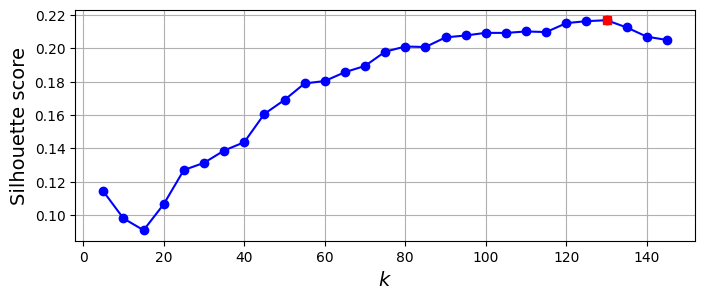

In [ ]:
#Choosing the best model
from sklearn.metrics import silhouette_score
silhouette_scores=[silhouette_score(X_train_reduced,model.labels_) for model in kmeans_per_k]
best_index=np.argmax(silhouette_scores)
best_k=k_range[best_index]
best_score=silhouette_scores[best_index]

plt.figure(figsize=(8,3))
plt.plot(k_range,silhouette_scores,"bo-")
plt.xlabel("$k$",fontsize=14)
plt.ylabel("Silhouette score",fontsize=14)
plt.plot(best_k,best_score,"rs")
plt.grid()
plt.show()


In [ ]:
best_k

130

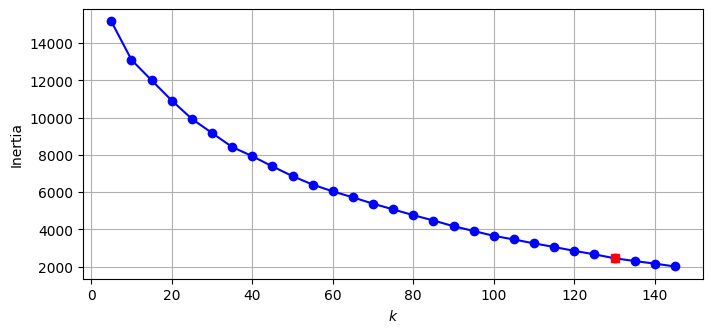

In [ ]:
#Double checking using model's inertia
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, "rs")
plt.grid()
plt.show()

In [ ]:
#Working with the best model
best_model=kmeans_per_k[best_index]

Cluster 0


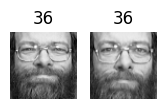

Cluster 1


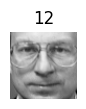

Cluster 2


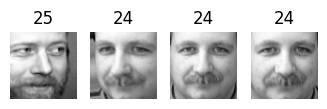

Cluster 3


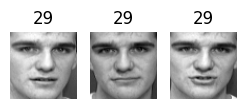

Cluster 4


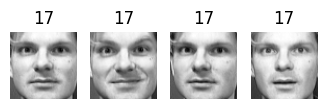

Cluster 5


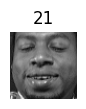

Cluster 6


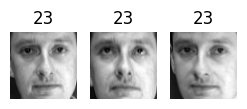

Cluster 7


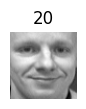

Cluster 8


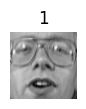

Cluster 9


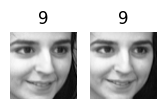

Cluster 10


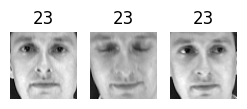

Cluster 11


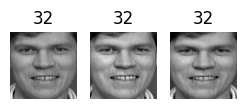

Cluster 12


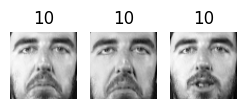

Cluster 13


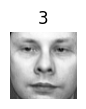

Cluster 14


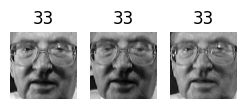

Cluster 15


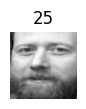

Cluster 16


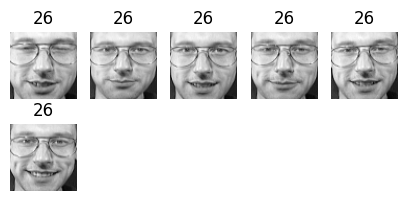

Cluster 17


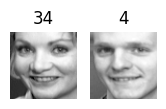

Cluster 18


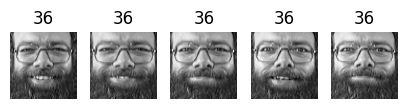

Cluster 19


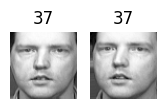

Cluster 20


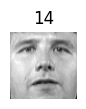

Cluster 21


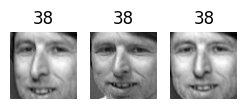

Cluster 22


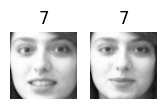

Cluster 23


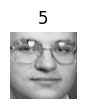

Cluster 24


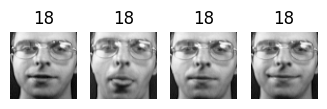

Cluster 25


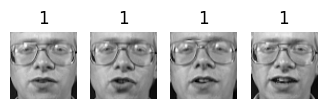

Cluster 26


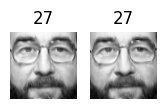

Cluster 27


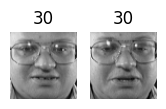

Cluster 28


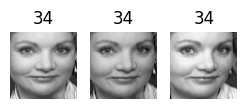

Cluster 29


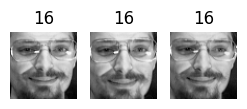

Cluster 30


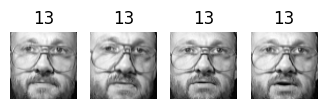

Cluster 31


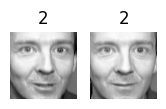

Cluster 32


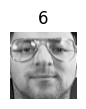

Cluster 33


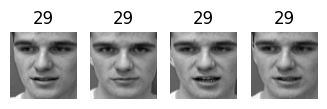

Cluster 34


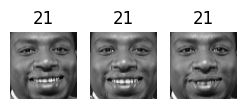

Cluster 35


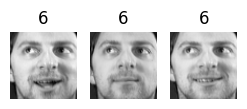

Cluster 36


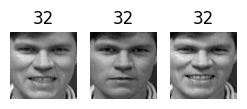

Cluster 37


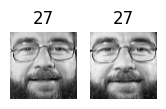

Cluster 38


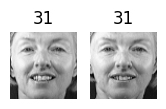

Cluster 39


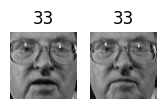

Cluster 40


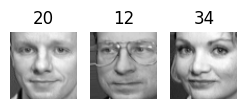

Cluster 41


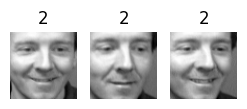

Cluster 42


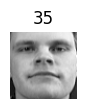

Cluster 43


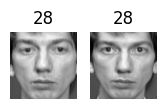

Cluster 44


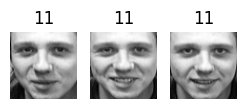

Cluster 45


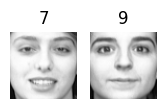

Cluster 46


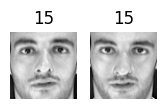

Cluster 47


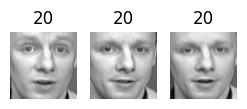

Cluster 48


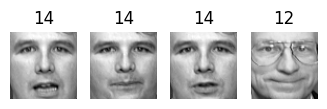

Cluster 49


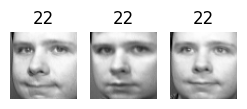

Cluster 50


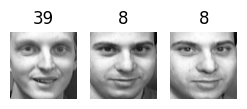

Cluster 51


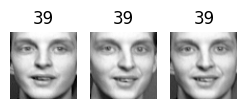

Cluster 52


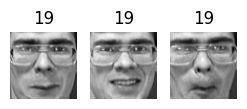

Cluster 53


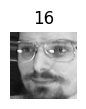

Cluster 54


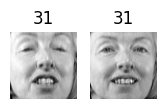

Cluster 55


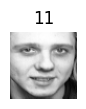

Cluster 56


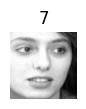

Cluster 57


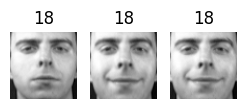

Cluster 58


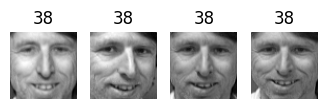

Cluster 59


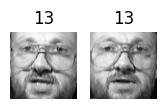

Cluster 60


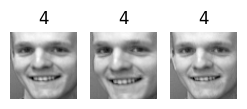

Cluster 61


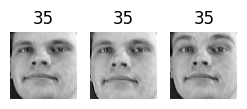

Cluster 62


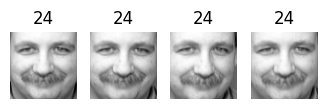

Cluster 63


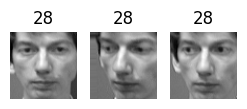

Cluster 64


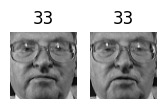

Cluster 65


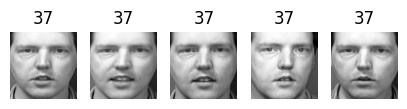

Cluster 66


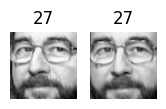

Cluster 67


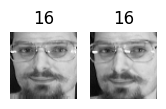

Cluster 68


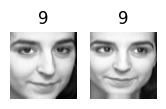

Cluster 69


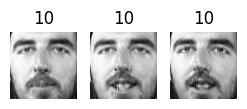

Cluster 70


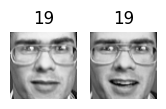

Cluster 71


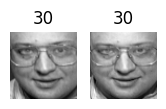

Cluster 72


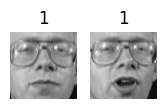

Cluster 73


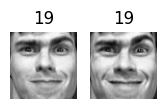

Cluster 74


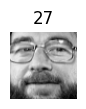

Cluster 75


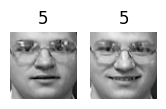

Cluster 76


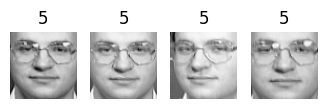

Cluster 77


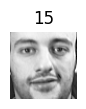

Cluster 78


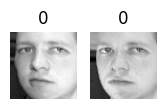

Cluster 79


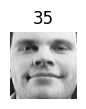

Cluster 80


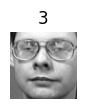

Cluster 81


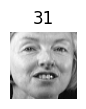

Cluster 82


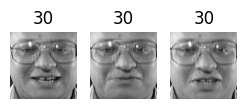

Cluster 83


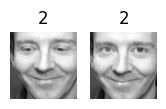

Cluster 84


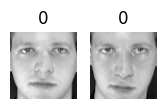

Cluster 85


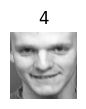

Cluster 86


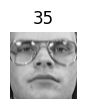

Cluster 87


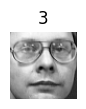

Cluster 88


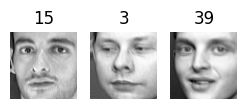

Cluster 89


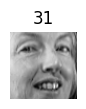

Cluster 90


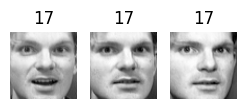

Cluster 91


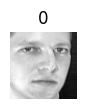

Cluster 92


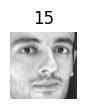

Cluster 93


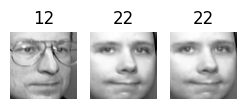

Cluster 94


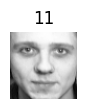

Cluster 95


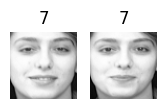

Cluster 96


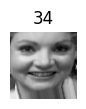

Cluster 97


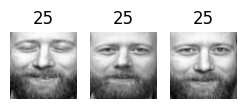

Cluster 98


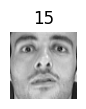

Cluster 99


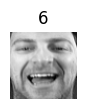

Cluster 100


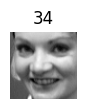

Cluster 101


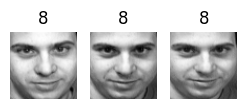

Cluster 102


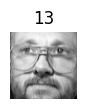

Cluster 103


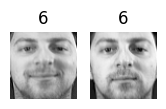

Cluster 104


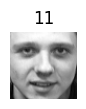

Cluster 105


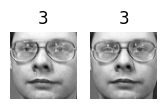

Cluster 106


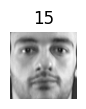

Cluster 107


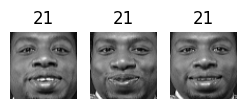

Cluster 108


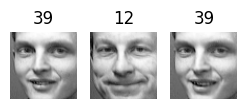

Cluster 109


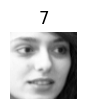

Cluster 110


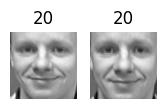

Cluster 111


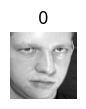

Cluster 112


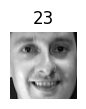

Cluster 113


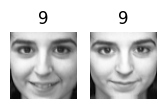

Cluster 114


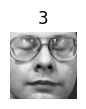

Cluster 115


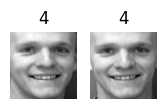

Cluster 116


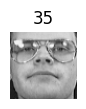

Cluster 117


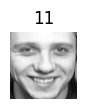

Cluster 118


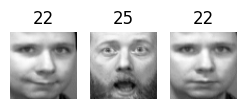

Cluster 119


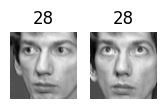

Cluster 120


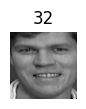

Cluster 121


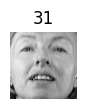

Cluster 122


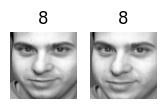

Cluster 123


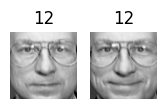

Cluster 124


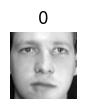

Cluster 125


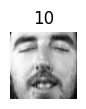

Cluster 126


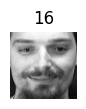

Cluster 127


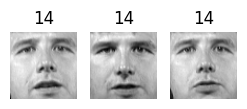

Cluster 128


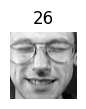

Cluster 129


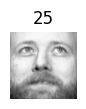

In [18]:
#Visualizing the Clusters
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

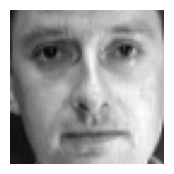

In [22]:
#Plotting Function
def plot_face(face):
    plt.figure(figsize=(2, 2))
    plt.imshow(face.reshape(64, 64), cmap="gray")
    plt.axis("off")
    plt.show()

plot_face(X_train[0])

In [23]:
#Training a Classifier with clustering Vs without Clustering
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train_reduced,y_train)

RandomForestClassifier(random_state=42)

In [24]:
clf.score(X_valid_reduced,y_valid)

0.8875

In [25]:
# Using KMeans as a Dimensionality Reduction tool
X_train_reduced_kmeans=best_model.transform(X_train_reduced)
X_valid_reduced_kmeans=best_model.transform(X_valid_reduced)
X_test_reduced_kmeans=best_model.transform(X_test_reduced)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)

clf.score(X_valid_reduced, y_valid)

0.925

In [27]:
# Searching for no of clusters that will give best performance
from sklearn.pipeline import make_pipeline
for n_clusters in k_range:
    kmeans = KMeans(n_clusters=n_clusters,n_init=10, random_state=42)
    pipeline = make_pipeline(kmeans, RandomForestClassifier(n_estimators=150, random_state=42))
    pipeline.fit(X_train_reduced, y_train)
    print(n_clusters, pipeline.score(X_valid_reduced, y_valid))

5 0.4625
10 0.5125
15 0.5125
20 0.625
25 0.6625
30 0.65
35 0.6875
40 0.725
45 0.7
50 0.7125
55 0.725
60 0.7375
65 0.7
70 0.6875
75 0.7125
80 0.75
85 0.7625
90 0.75
95 0.7375
100 0.7
105 0.7375
110 0.7375
115 0.7125
120 0.725
125 0.7125
130 0.7125
135 0.7375
140 0.7375
145 0.75


In [28]:
#Appending features from reduced to original set
X_train_extended = np.c_[X_train_reduced, X_train_reduced_kmeans]
X_valid_extended = np.c_[X_valid_reduced, X_valid_reduced_kmeans]
X_test_extended = np.c_[X_test_reduced, X_test_reduced_kmeans]

In [29]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.7875

The above Cluster is not useful for traing this dataset but can help in labelling new instances

In [33]:
# Using Gaussian Mixture Model
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_reduced)

In [34]:
#Generating New Faces using sample() method
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

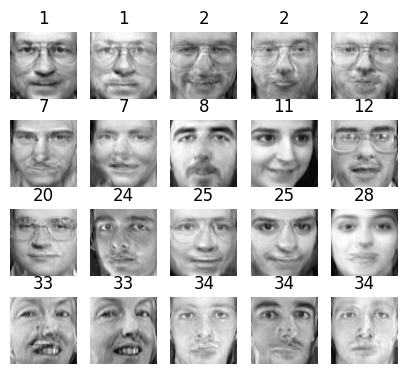

In [35]:
plot_faces(gen_faces, y_gen_faces)

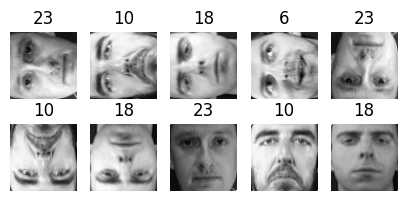

In [36]:
# Rotating and flipping and darkening images to check if model can detect anomalies
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [37]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [38]:
gm.score_samples(X_bad_faces_pca)

array([-4.60898708e+07, -3.17453096e+07, -3.02468121e+07, -4.73996004e+07,
       -3.17359131e+07, -5.27950948e+07, -4.90635787e+07, -1.16021764e+08,
       -9.50940824e+07, -9.19451078e+07])

In [40]:
gm.score_samples(X_train_reduced[:10])

array([1123.83861465, 1126.4459246 , 1126.44592303, 1176.66453373,
       1139.60074654, 1146.18455695, 1007.56476929, 1118.90303306,
       1131.05139328, 1160.15653866])

Model successfully detected anomalies as their scores are pretty low than normal instances